## Meta Cascade Routing Project


### Plot accuracies comparison

In [4]:
%load_ext autoreload
%autoreload 2
import os
import sys

# Allow loading function from project
module_path = os.path.abspath(os.path.join('../'))
print(module_path)
sys.path.insert(0, module_path)

from utils.metrics import Accuracies, Subtask, MetricsChecker

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/data/home/allysson/Projects/LLMEval/unitxt-mcr/meta-cascade


In [13]:
def plot_accuracy_data(result: Accuracies, model_name: str, items: int = 0, indexes: list[int] | None = None) -> list[int] | None:
    import matplotlib.pyplot as plt
    import numpy as np
    import random

    subtask_list: list[Subtask] = []
    subtask_indexes: list[int] | None = None

    if indexes is not None and len(indexes) > 0:
        subtask_indexes = indexes
        subtask_list = [result.subtasks[i] for i in indexes]
    elif items > 0:
        subtask_indexes = random.choices(range(len(result.subtasks)), k=items)
        subtask_list = [result.subtasks[i] for i in subtask_indexes]
    else:
        subtask_list = result.subtasks

    accuracy = [subtask.accuracy for subtask in subtask_list]

    llmaj = [subtask.llmaj for subtask in subtask_list]

    names = [subtask.name.split('mmlu_')[1].replace("_", " ") for subtask in subtask_list]

    plt.subplots(figsize =(16, 6)) 

    bar_width = 0.4

    x1 = np.arange(len(accuracy))
    x2 = [x + bar_width for x in x1]
    plt.bar(x1, accuracy, align='edge', width=bar_width, color='#fdb06d', label='Accuracy Metric')
    plt.bar(x2, llmaj, align='edge', width=bar_width, color='#6dbafd', label='LLMaJ Metric')
    plt.xticks([r + bar_width for r in range(len(names))], names, rotation=90)


    plt.legend()

    plt.title(f"\nUNITXT Accuracy x LLMaJ - {model_name}\n")
    plt.xlabel("MMLU Subtasks")
    plt.ylabel("Subtask Accuracy")

    plt.grid(axis='y', linewidth=0.2)

    plt.show()

    return subtask_indexes

Retrieving Evaluation Data

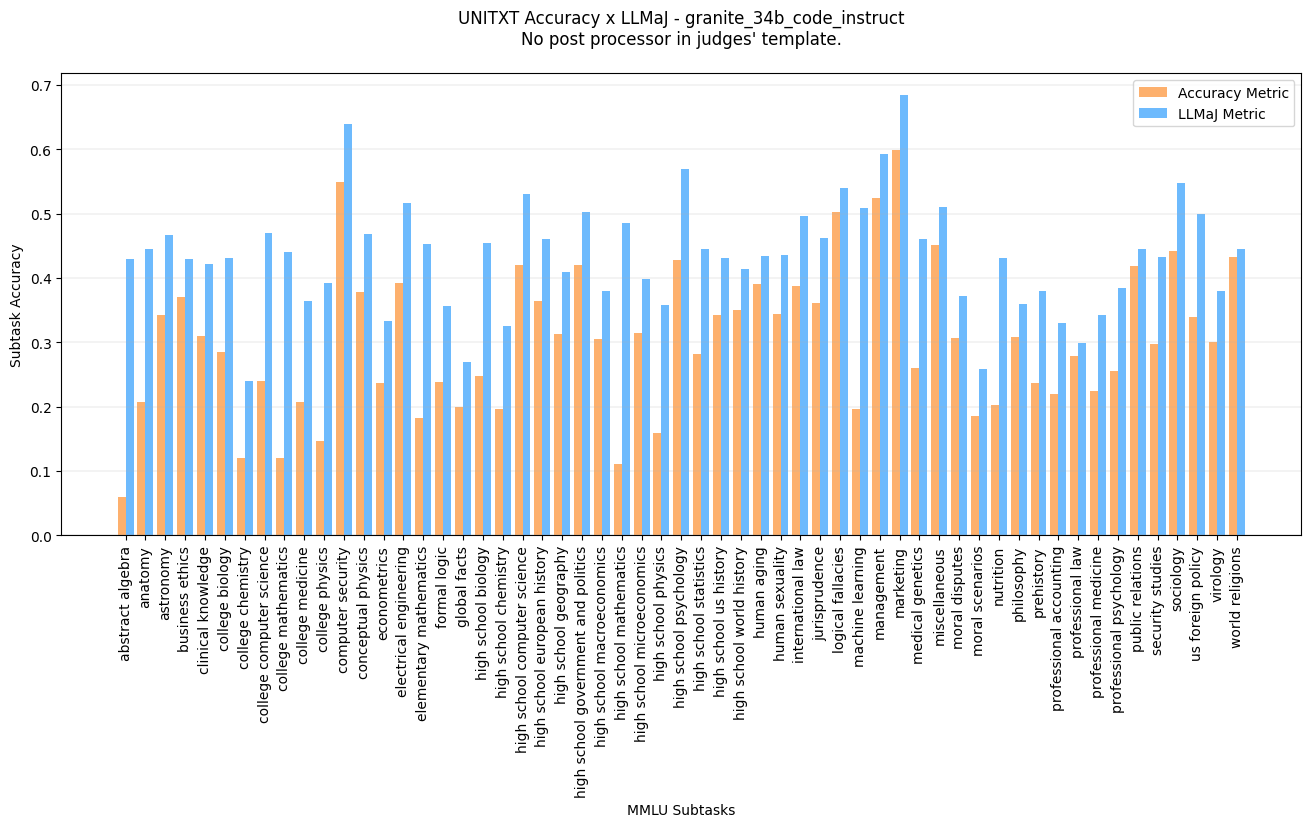

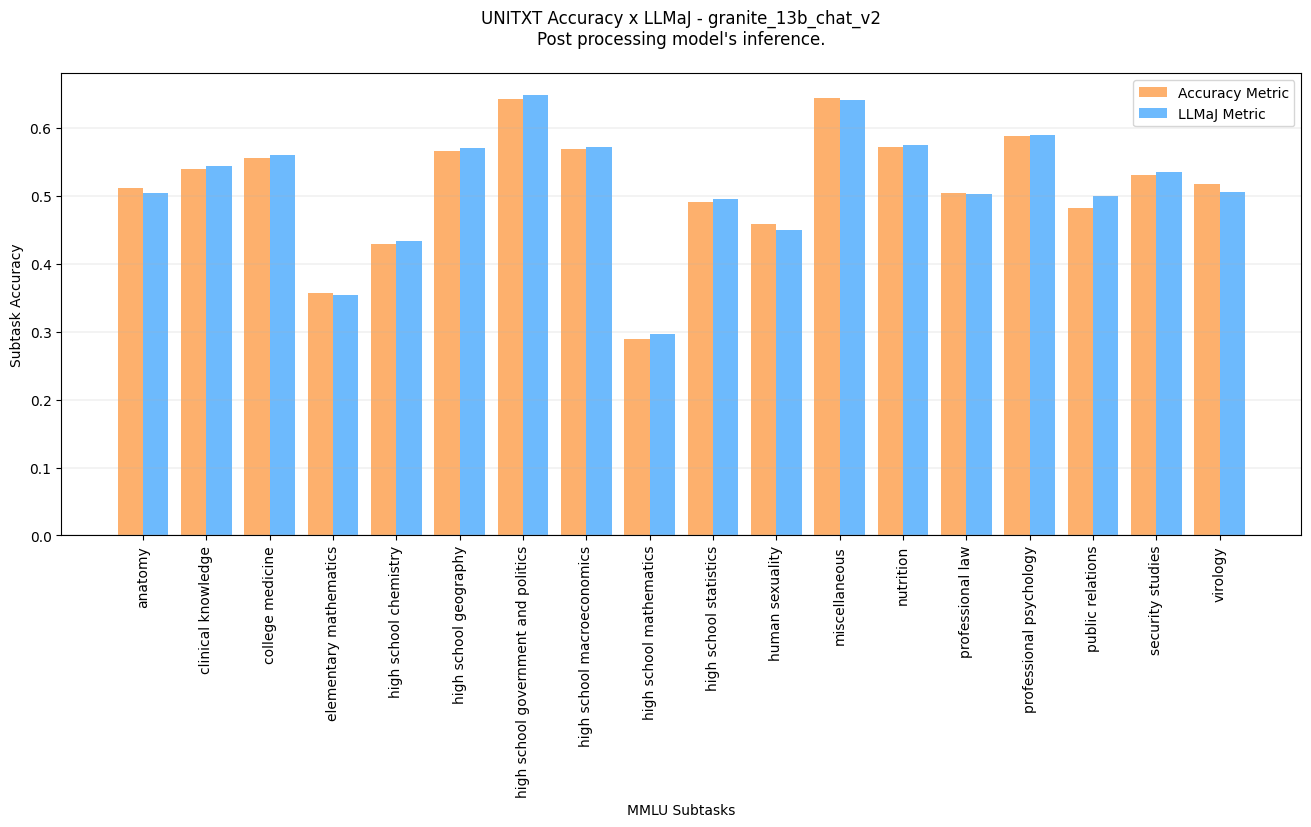

In [12]:
evaluation_results = MetricsChecker()

results_path='/data/home/allysson/EVAL_DATA/Tests/postprocessor/granite_34b_code_instruct/results'

result = evaluation_results.check_model_accuracies(results_path)

plot_accuracy_data(result, 'granite_34b_code_instruct\nNo post processor in judges\' template.\n') # type: ignore - function defined in previous cell

results_path='/data/home/allysson/EVAL_DATA/Tests/postprocessor/granite_13b_chat_v2/results'

result = evaluation_results.check_model_accuracies(results_path)

plot_accuracy_data(result, 'granite_13b_chat_v2\nPost processing model\'s inference.\n') # type: ignore - function defined in previous cell

